# 6.4 Supervised Machine Learning: Regression

## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing path
path = r'C:\Users\Aricia\11-2025 Chocolate Bar Ratings'

In [4]:
# Importing previously cleaned data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_choc_clean.csv'), index_col = False)

## Checking and cleaning data

In [5]:
df.columns

Index(['Unnamed: 0', 'company_manufacturer', 'bar_origin', 'review_ID',
       'review_date', 'cocoa_percentage', 'company_location', 'rating',
       'bean_region'],
      dtype='object')

In [6]:
# Dropping the Unnamed column 
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df.head (5)

,company_manufacturer,bar_origin,review_ID,review_date,cocoa_percentage,company_location,rating,bean_region
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


In [8]:
df.shape

(1795, 8)

In [9]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

company_manufacturer    0
bar_origin              0
review_ID               0
review_date             0
cocoa_percentage        0
company_location        0
rating                  0
bean_region             0
dtype: int64

In [10]:
# Check for duplicates
dups = df.duplicated()
dups.shape # No dups

(1795,)

### Extreme values check

C:\Users\Aricia\AppData\Local\Temp\ipykernel_27876\3896341444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'], bins=25) # Shows extreme values


<Axes: xlabel='rating', ylabel='Density'>

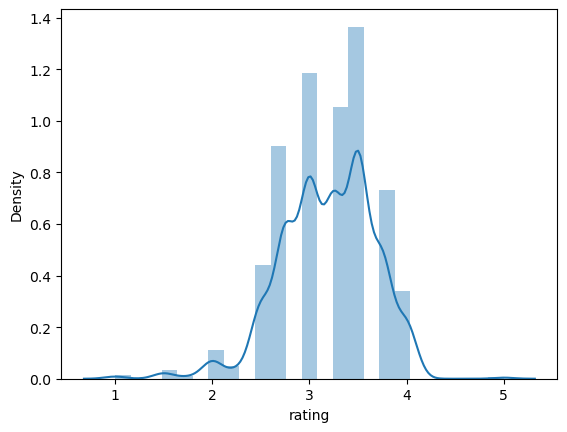

In [11]:
sns.distplot(df['rating'], bins=25) # Shows extreme values

Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['rating'].mean() # Check the mean

np.float64(3.185933147632312)

In [13]:
df['rating'].median() # Check the median

3.25

In [14]:
df['rating'].max() # Check the max

5.0

In [15]:
df['rating'].min() # Check the min

1.0

## Data prep for regression analysis

Hypothesis: If a chocolate bar has a higher cocoa percentage, then it will receive a higher rating

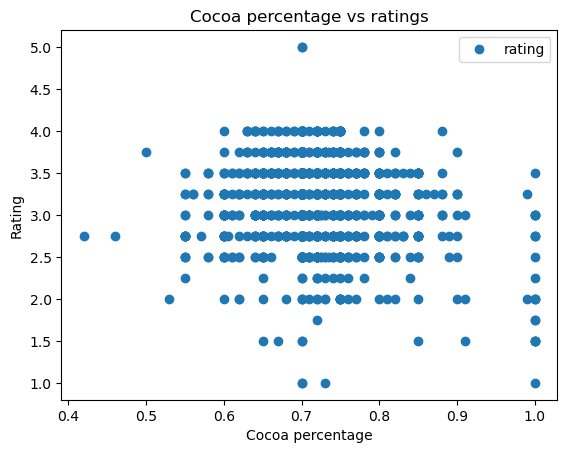

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'cocoa_percentage', y='rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cocoa percentage vs ratings')  
plt.xlabel('Cocoa percentage')  
plt.ylabel('Rating')  
plt.show()

Analysis: According to scatterplot, there is not a strong correlation between cocoa percentage and ratings. There are some outliers on the dataset, however, most values are concentrated between 2.5 and 3.5 ratings, and cocoa percentage from 60% to 80%. The graphic points out for a lack of predictability between cocoa percentage and possible ratings.

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['cocoa_percentage'].values.reshape(-1,1)
y = df['rating'].values.reshape(-1,1)

In [18]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.65],
       [0.62],
       [0.65]], shape=(1795, 1))

In [20]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.5 ],
       [3.25],
       [3.  ]], shape=(1795, 1))

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

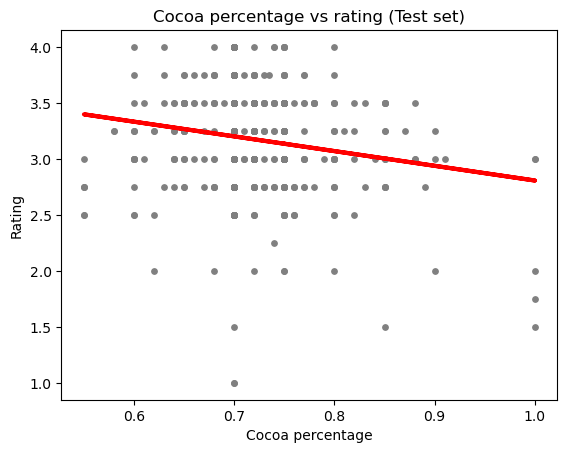

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa percentage vs rating (Test set)')
plot_test.xlabel('Cocoa percentage')
plot_test.ylabel('Rating')
plot_test.show()

The line does not look like a good fit for the data, as the data points are not close to the line itself.

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.2095351310152621
R2 score:  0.01811002046167509


In [28]:
y_predicted

array([[3.13545711],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.06979435],
       [3.39810813],
       [3.20111986],
       [3.13545711],
       [3.25365007],
       [3.26678262],
       [3.27991517],
       [3.20111986],
       [3.26678262],
       [3.20111986],
       [3.13545711],
       [3.06979435],
       [3.0041316 ],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.16172221],
       [3.39810813],
       [2.80714333],
       [3.33244537],
       [3.13545711],
       [3.13545711],
       [3.22738497],
       [3.20111986],
       [3.22738497],
       [3.17485476],
       [3.20111986],
       [3.20111986],
       [3.20111986],
       [3.13545711],
       [3.20111986],
       [3.17485476],
       [3.27991517],
       [3.17485476],
       [3.20111986],
       [3.13545711],
       [3.26678262],
       [3.20111986],
       [3.39810813],
       [3.20111986],
       [3.33244537],
       [3.10919201],
       [3.135

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.50,3.135457
1,2.75,3.174855
2,2.50,3.201120
3,3.25,3.201120
4,3.25,3.069794
5,2.75,3.398108
6,3.50,3.201120
7,2.50,3.135457
8,3.50,3.253650
9,3.50,3.266783


### Compare how the regression fits the training set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.3132551]]
Mean squared error:  0.22774918296663346
R2 score:  0.029784249226460058


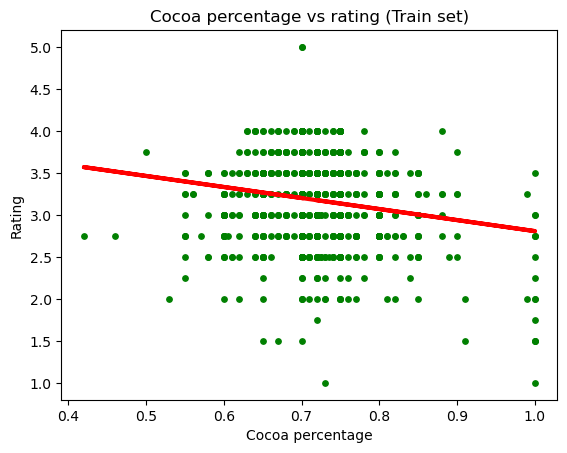

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa percentage vs rating (Train set)')
plot_test.xlabel('Cocoa percentage')
plot_test.ylabel('Rating')
plot_test.show()

According to the summary statistics and the test sets, the model is not a perfect fit for this analysis, as few data points actually are close to the regression line. The slope(-1.3132551) shows that when a unit of cocoa_percentage increases, -1.3132... rating should decrease. The R2 score though shows that we cannot confidently use this slope, as it only fits leass than 2% of the data. In addition to it, the mean squad error (0.2095351310152621) is  also high considering a mean of slightly over 3.
When comparing how the dataset fits the training, it does offer us a slightly better result, however it is still a weak correlation, and a not good fit overall.